# Praca domowa 7+8

In [38]:
import plotly.express as px
from gapminder import gapminder
import numpy as np
import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import nycflights13

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

### Wykres1

Na zajęciach pojawił się taki wykres:

In [9]:
airlines = nycflights13.airlines
airports = nycflights13.airports
flights = nycflights13.flights
planes = nycflights13.planes
weather = nycflights13.weather

<AxesSubplot:xlabel='date'>

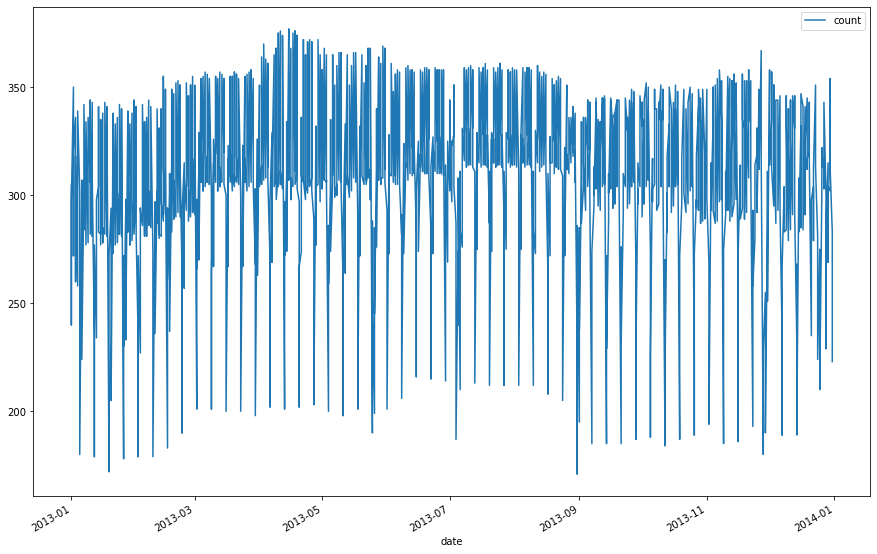

In [26]:
flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']]
flights2.merge(weather, on=['origin','year','month','day','hour'])
flight_count = flights2.groupby(['origin','year', 'month', 'day'])\
                .count()\
                .reset_index()\
                .drop(['dest','tailnum', 'carrier'], axis=1)\
                .rename(columns={'hour': 'count'})
flight_count['date'] = pd.to_datetime(flight_count[['year', 'month', 'day']])
flight_count = flight_count.drop(['year', 'month', 'day'], axis=1)
flight_count.plot(x='date', y='count', figsize=(15, 10))

In [64]:
df = flight_count
fig = px.line(df, x="date", y="count", color="origin")
fig.show()

Wykres interaktywny jest lepszy, ponieważ pokazuje także podział na lotniska, a także można wybrać które z nich będą wyświetlane.

### Wykres2

In [82]:
flight_count1 = flights2.groupby(['origin'])\
                .count()\
                .reset_index()\
                .drop(['dest','tailnum', 'carrier','year', 'month', 'day'], axis=1)\
                .rename(columns={'hour': 'count'})
                        


In [83]:
flight_count1

,origin,count
0,EWR,120835
1,JFK,111279
2,LGA,104662


<AxesSubplot:xlabel='origin'>

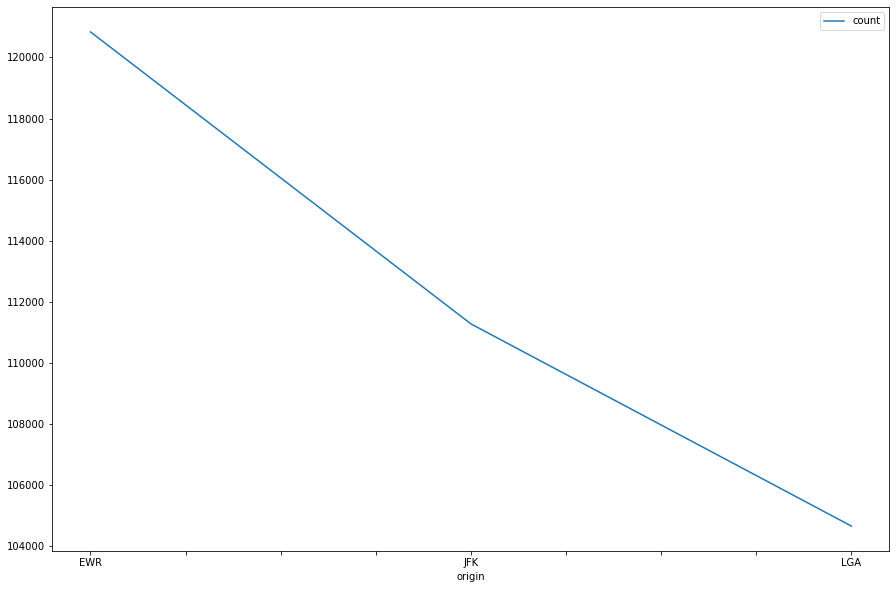

In [84]:
flight_count1.plot(x='origin', y='count', figsize=(15, 10))

In [91]:
df = flight_count
fig = px.scatter(df, x="origin", y="count", animation_frame="date")

fig.show()

ValueError: 
    Invalid value of type 'pandas._libs.tslibs.timestamps.Timestamp' received for the 'name' property of frame
        Received value: Timestamp('2013-01-01 00:00:00')

    The 'name' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [ ]:
Wykres interaktywny jest lepszy, ponieważ pokazuje dane dla wybranej daty, a nie jak statyczny tylko sumę z całego roku.

### Wykres3

In [49]:
iris = px.data.iris()

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

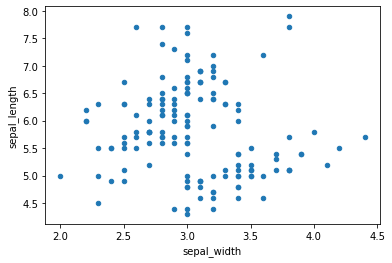

In [55]:
iris.plot.scatter(x='sepal_width', y='sepal_length')



In [32]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

Wykres statyczny jest gorszy, ponieważ nie są w nim rozdzielone gatunki. Ponadto, na wykresie interaktywnym można wybrać, które z gatunków będą wyświetlane.